Mehul Agarwal - MBA in Business Analytics - SCMHRD (2019-21)

### Risk Analytics
Calculate the possible Expected Loss value from given customer loan data!

Loading required libraries!

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

Reading the given Excel file!

In [2]:
df = pd.read_excel('Risk Analytics Assignment-2.xlsx', sheet_name = "Data")

In [3]:
df.head()

,Cust_Id,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Hyderabad,22,0,4425000,RENT,123.0,PERSONAL,D,2625000,16.02,1,Y,3
1,2,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
2,3,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
3,4,Hyderabad,23,1,4912500,RENT,4.0,MEDICAL,C,2625000,15.23,1,N,2
4,5,Delhi,24,1,4080000,RENT,8.0,MEDICAL,C,2625000,14.27,1,Y,4


Dataset has 32581 rows and 14 columns

In [4]:
df.shape

(32581, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cust_Id          32581 non-null  int64  
 1   Location         32581 non-null  object 
 2   Age              32581 non-null  int64  
 3   Car Ownership    32581 non-null  int64  
 4   Income           32581 non-null  int64  
 5   Home Type        32581 non-null  object 
 6   Job Experience   31686 non-null  float64
 7   Loan Purpose     32581 non-null  object 
 8   Loan Grade       32581 non-null  object 
 9   Loan Balance     32581 non-null  int64  
 10  Interest Rate    29465 non-null  float64
 11  loan_status      32581 non-null  int64  
 12  Default History  32581 non-null  object 
 13  Credit History   32581 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 3.5+ MB


Checking if there are any missing values

In [6]:
df.isnull().sum()

Cust_Id               0
Location              0
Age                   0
Car Ownership         0
Income                0
Home Type             0
Job Experience      895
Loan Purpose          0
Loan Grade            0
Loan Balance          0
Interest Rate      3116
loan_status           0
Default History       0
Credit History        0
dtype: int64

<AxesSubplot:>

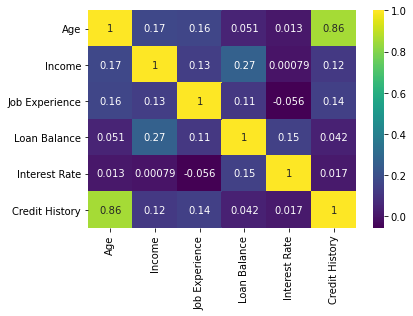

In [7]:
import seaborn as sns
sns.heatmap(df[['Age','Income','Job Experience','Loan Balance','Interest Rate','Credit History']].corr(),annot=True,cmap='viridis')
#Checking for correlation, as we can see from the below heatmap, there exists a high correlation between Age and credit history

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

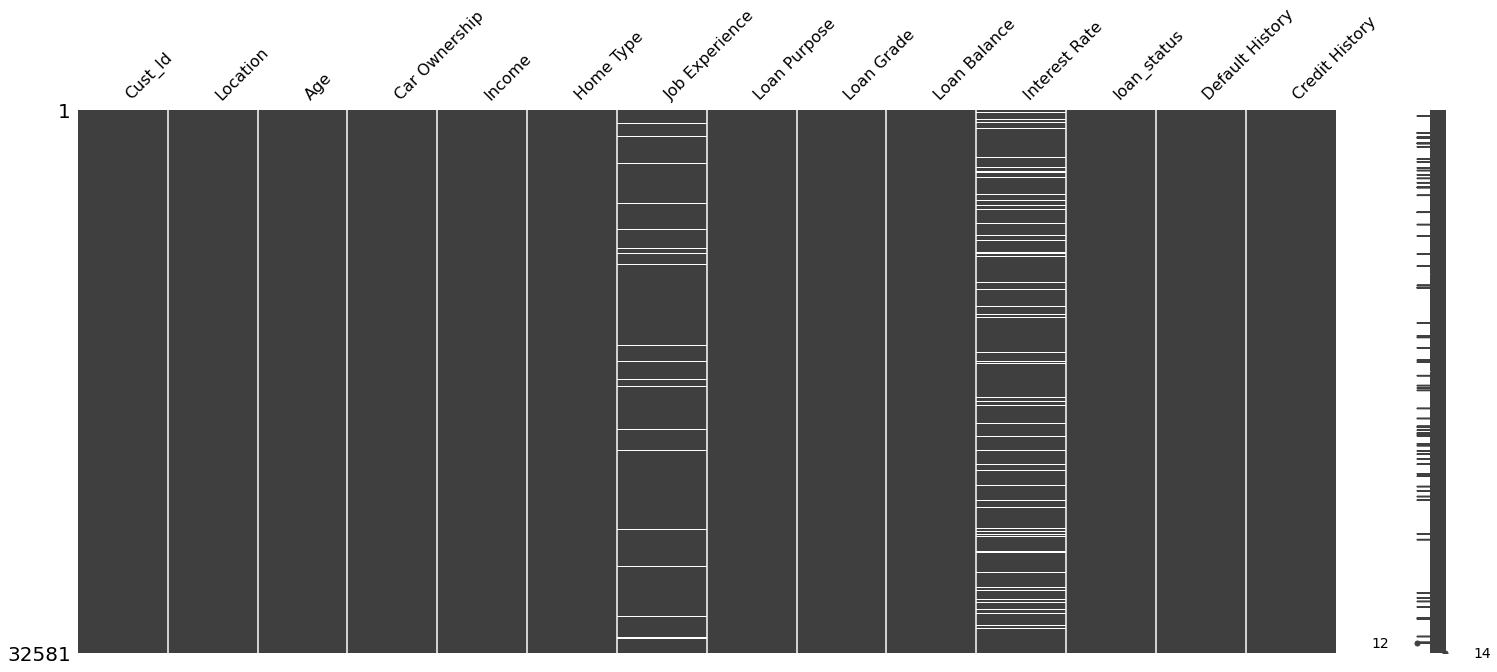

In [9]:
import missingno as msno 
msno.matrix(df)
#Missing Value Visualization.
#As we can see from the below graph values are missing at random (MAR)

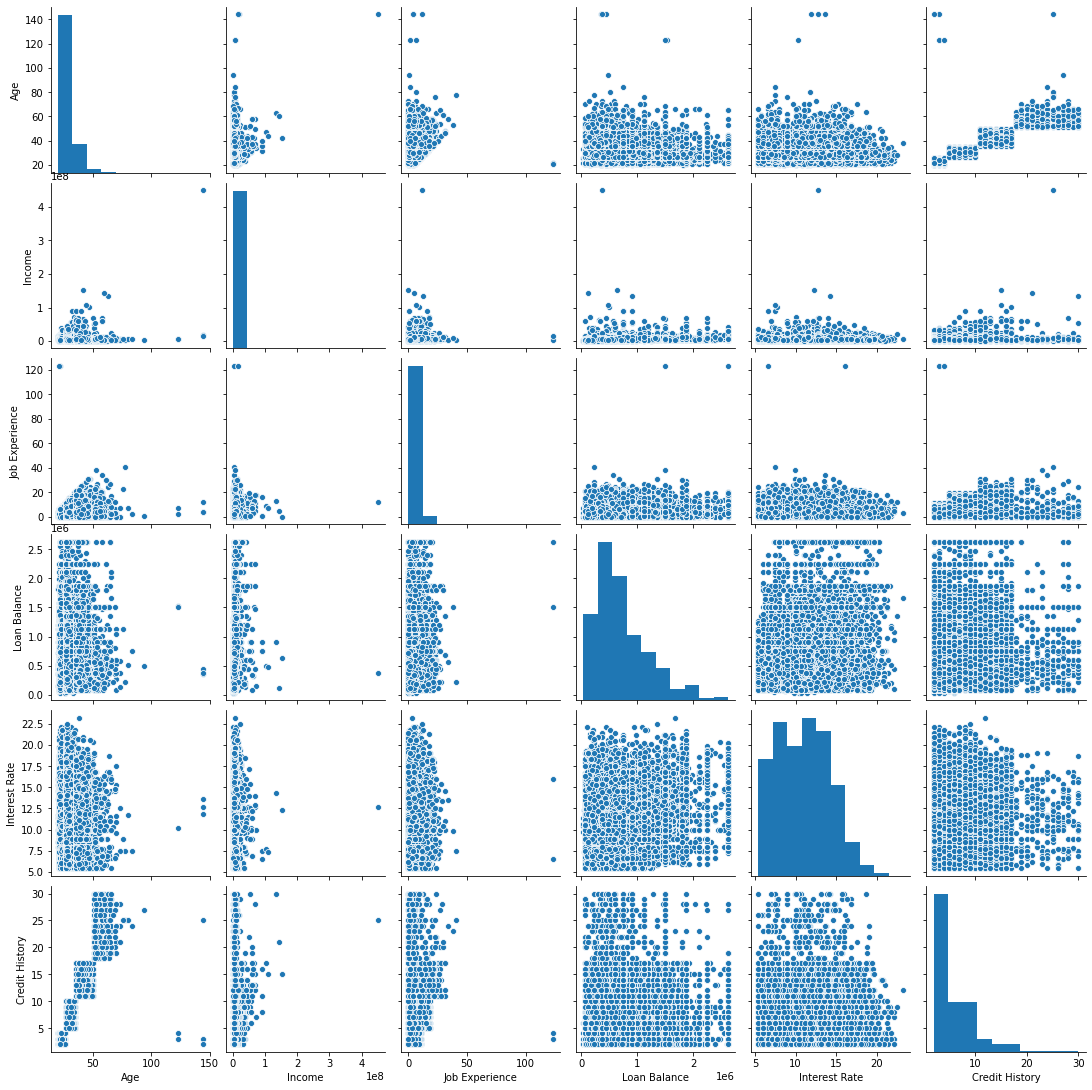

In [10]:
sns.pairplot(df.drop(columns=['Cust_Id','loan_status','Car Ownership']))
#plotting pair plot to understand bivariate distribution

<AxesSubplot:xlabel='loan_status', ylabel='count'>

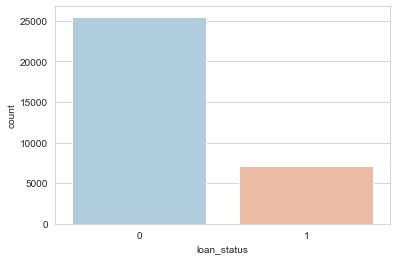

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df,palette='RdBu_r')
#Class imbalance of target variable

<AxesSubplot:xlabel='loan_status', ylabel='count'>

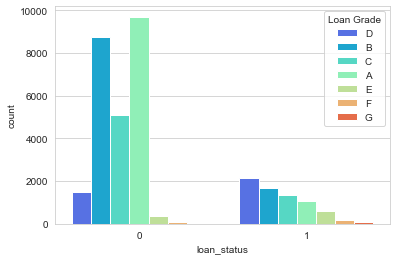

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='Loan Grade',data=df,palette='rainbow')
# As we can see from the below graph, out of all the defaults, most of the defaults are of the loan grade D

<AxesSubplot:xlabel='loan_status', ylabel='count'>

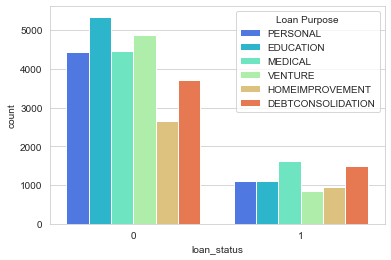

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='Loan Purpose',data=df,palette='rainbow')
#Most of the default loans had Medical condition as purpose

<AxesSubplot:xlabel='loan_status', ylabel='count'>

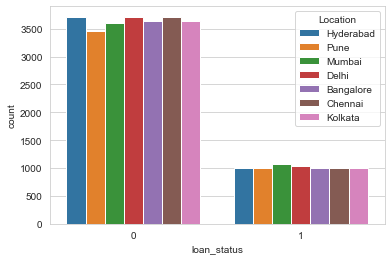

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='Location',data=df)
#As we can see from the below graph, defualts are not location specific

<AxesSubplot:xlabel='loan_status', ylabel='count'>

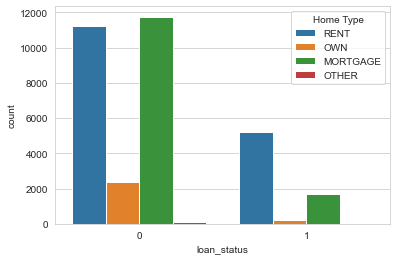

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='Home Type',data=df)
#Most of the defaulters are staying in rented house.

[(290000.0, 15000000.0)]

<Figure size 864x504 with 0 Axes>

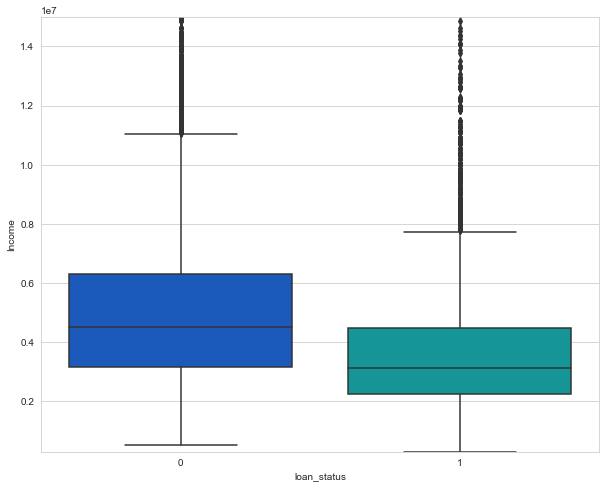

In [16]:
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.boxplot(x='loan_status',y='Income',data=df,palette='winter')
ax1.set(ylim=(290000,15000000))
#Customers who have defaulted had lesser median income compared to people who have defaulted 

<Figure size 864x504 with 0 Axes>

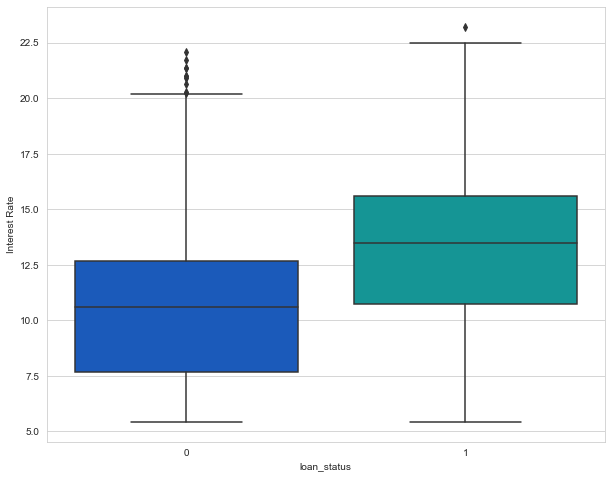

In [17]:
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.boxplot(x='loan_status',y='Interest Rate',data=df,palette='winter')
#Customers who have defaulted had higher rate of interest, this makes sense as these customers might have had bad credit history

[(10.0, 60.0)]

<Figure size 864x504 with 0 Axes>

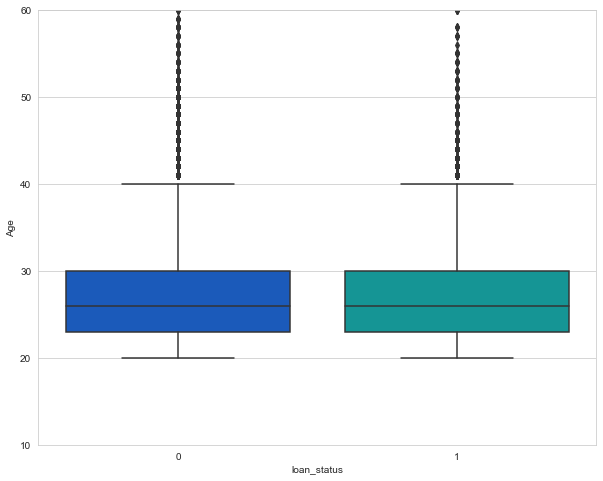

In [18]:
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.boxplot(x='loan_status',y='Age',data=df,palette='winter')
ax1.set(ylim=(10,60))
#There is no distinghuishing factor age between customers who have defualted and customers who have not

<Figure size 864x504 with 0 Axes>

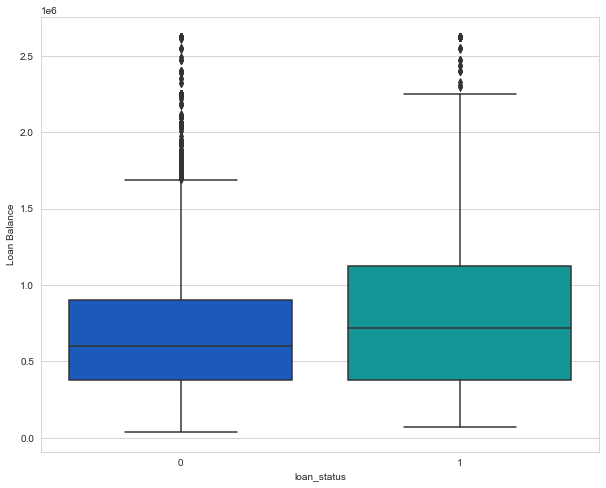

In [19]:
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.boxplot(x='loan_status',y='Loan Balance',data=df,palette='winter')
#Customers who have defaulted had more loan balance, also the spread of loan balance is high

[(0.0, 30.0)]

<Figure size 864x504 with 0 Axes>

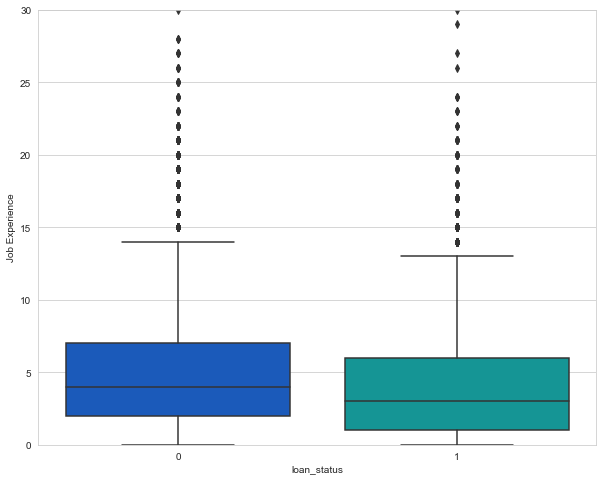

In [20]:
plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.boxplot(x='loan_status',y='Job Experience',data=df,palette='winter')
ax1.set(ylim=(0,30))

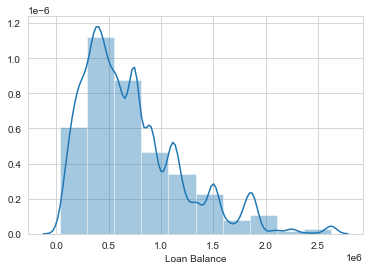

In [21]:
ax = sns.distplot(df['Loan Balance'],kde=True,bins=10)
#Distribution of loan balance

# Treating Outliers

In [22]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
#Calculating 25th Quartile and 75th quartile

In [23]:
IQR=Q3-Q1
# Calculating inter quartile range

In [24]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
#Calculating upper and lower whiskers

In [25]:
print(Lower_Whisker, Upper_Whisker)

12.5 40.5


In [26]:
df = df[df['Age'] < Upper_Whisker]
#Removing outliers who are above the upper whisker

In [27]:
df.shape

(31087, 14)

In [28]:
Q1=df['Job Experience'].quantile(0.25)
Q3=df['Job Experience'].quantile(0.75)

In [29]:
IQR=Q3-Q1

In [30]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

In [31]:
print(Lower_Whisker, Upper_Whisker)

-5.5 14.5


In [32]:
df = df[df['Job Experience'] < Upper_Whisker]

In [33]:
df.shape

(29531, 14)

# Missing Value Imputation

In [34]:
df.isnull().sum()

Cust_Id               0
Location              0
Age                   0
Car Ownership         0
Income                0
Home Type             0
Job Experience        0
Loan Purpose          0
Loan Grade            0
Loan Balance          0
Interest Rate      2820
loan_status           0
Default History       0
Credit History        0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
df = df.fillna(df.mean())
# Filling missing values with mean value of the feature

In [36]:
df = pd.DataFrame(df)
df.isnull().sum()

Cust_Id            0
Location           0
Age                0
Car Ownership      0
Income             0
Home Type          0
Job Experience     0
Loan Purpose       0
Loan Grade         0
Loan Balance       0
Interest Rate      0
loan_status        0
Default History    0
Credit History     0
dtype: int64

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
# save for later - EAD calculation model
df2 = df.copy(deep=True)

# Scaling Numerical Values

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
#taking in all the numerical values to scale using minmax scaler.
df_scaled = sc.fit_transform(df[['Age','Income','Job Experience','Loan Balance','Interest Rate','Credit History']])
df_scaled = pd.DataFrame(df_scaled)
df = df.drop(columns=['Age','Income','Job Experience','Loan Balance','Interest Rate','Credit History'])
df_scaled.rename(columns={ df_scaled.columns[0]: "Age" }, inplace = True)
df_scaled.rename(columns={ df_scaled.columns[1]: "Income" }, inplace = True)
df_scaled.rename(columns={ df_scaled.columns[2]: "Job Experience" }, inplace = True)
df_scaled.rename(columns={ df_scaled.columns[3]: "Loan Balance" }, inplace = True)
df_scaled.rename(columns={ df_scaled.columns[4]: "Interest Rate" }, inplace = True)
df_scaled.rename(columns={ df_scaled.columns[5]: "Credit History" }, inplace = True)
df.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)
df = pd.concat([df[:], df_scaled],axis=1)

In [40]:
df

,Cust_Id,Location,Car Ownership,Home Type,Loan Purpose,Loan Grade,loan_status,Default History,Age,Income,Job Experience,Loan Balance,Interest Rate,Credit History
0,2,Pune,1,OWN,EDUCATION,B,0,N,0.05,0.004616,0.357143,0.014493,0.321348,0.000000
1,3,Mumbai,1,MORTGAGE,MEDICAL,C,1,N,0.25,0.004616,0.071429,0.144928,0.418539,0.066667
2,4,Hyderabad,1,RENT,MEDICAL,C,1,N,0.15,0.051358,0.285714,1.000000,0.551124,0.000000
3,5,Delhi,1,RENT,MEDICAL,C,1,Y,0.20,0.042076,0.571429,1.000000,0.497191,0.133333
4,6,Pune,1,OWN,VENTURE,A,1,N,0.05,0.004867,0.142857,0.057971,0.096629,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,32290,Delhi,1,MORTGAGE,HOMEIMPROVEMENT,B,0,N,1.00,0.024182,0.142857,0.014493,0.316242,0.866667
29527,32291,Chennai,1,MORTGAGE,DEBTCONSOLIDATION,A,0,N,0.85,0.071844,0.785714,0.101449,0.067416,0.866667
29528,32293,Mumbai,0,MORTGAGE,DEBTCONSOLIDATION,A,0,N,0.90,0.163824,0.000000,0.072464,0.126966,0.666667
29529,32294,Chennai,0,MORTGAGE,MEDICAL,B,0,N,0.90,0.088568,0.357143,0.449275,0.369101,0.733333


In [41]:
df.drop(columns=['Cust_Id'], inplace = True)
#dropping customer Id column as it is not useful while builsing the model

In [42]:
df.head()

,Location,Car Ownership,Home Type,Loan Purpose,Loan Grade,loan_status,Default History,Age,Income,Job Experience,Loan Balance,Interest Rate,Credit History
0,Pune,1,OWN,EDUCATION,B,0,N,0.05,0.004616,0.357143,0.014493,0.321348,0.000000
1,Mumbai,1,MORTGAGE,MEDICAL,C,1,N,0.25,0.004616,0.071429,0.144928,0.418539,0.066667
2,Hyderabad,1,RENT,MEDICAL,C,1,N,0.15,0.051358,0.285714,1.000000,0.551124,0.000000
3,Delhi,1,RENT,MEDICAL,C,1,Y,0.20,0.042076,0.571429,1.000000,0.497191,0.133333
4,Pune,1,OWN,VENTURE,A,1,N,0.05,0.004867,0.142857,0.057971,0.096629,0.000000


In [43]:
rep = { 'Y':1,
       'N':0}
df = df.replace(rep)
#Replacing 'Y' Values with 1 and 'N' Values with 0

In [44]:
df = pd.get_dummies(df)
# Converting all the categorical values to numerical

In [45]:
df.head()

,Car Ownership,loan_status,Default History,Age,Income,Job Experience,Loan Balance,Interest Rate,Credit History,Location_Bangalore,...,Loan Purpose_MEDICAL,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G
0,1,0,0,0.05,0.004616,0.357143,0.014493,0.321348,0.000000,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0.25,0.004616,0.071429,0.144928,0.418539,0.066667,0,...,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0.15,0.051358,0.285714,1.000000,0.551124,0.000000,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,1,0.20,0.042076,0.571429,1.000000,0.497191,0.133333,0,...,1,0,0,0,0,1,0,0,0,0
4,1,1,0,0.05,0.004867,0.142857,0.057971,0.096629,0.000000,0,...,0,0,1,1,0,0,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop(columns=['loan_status'])
#Taking in the independent variables

In [48]:
Y = df['loan_status']
#Taking in the dependent variables

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, test_size=0.20,stratify=Y, 
                                                    random_state=101)
#Splitting the data into train and test with stratify option available in the sklearn's train_test_split method

In [50]:
y_train.value_counts()
#As we can see from the below ouput train data is highly imbalanced with 18500 '0's and 5124 '1's

0    18500
1     5124
Name: loan_status, dtype: int64

In [51]:
y_train.value_counts(normalize = True)
#As we can see from the below ouput train data is highly imbalanced with 78.3% '0's and 21.6% '1's

0    0.783102
1    0.216898
Name: loan_status, dtype: float64

In [52]:
#Using Synthetic Minority Over Sampling Technique(SMOTE) to balance the target class.
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [53]:
y_train.columns = ['Loan_Status']
y_train.shape

(23624,)

In [54]:
y_train.value_counts(normalize = True)
#As we can see from the below ouput train data is highly imbalanced with 50% '0's and 50% '1's

0    0.783102
1    0.216898
Name: loan_status, dtype: float64

In [55]:
X_train.shape, y_train.shape

((23624, 32), (23624,))

In [56]:
X_test.shape, y_test.shape

((5907, 32), (5907,))

#### Use for train - X_train_res, y_train_res
#### Use for test - X_test, y_test

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [58]:
# testing multiple models
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
print(models)

[('LogisticRegression', LogisticRegression()), ('SVC', SVC()), ('LinearSVC', LinearSVC()), ('KNeighbors', KNeighborsClassifier()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier())]


C:\Users\mehul\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification report for : LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      4626
           1       0.50      0.73      0.59      1281

    accuracy                           0.78      5907
   macro avg       0.71      0.76      0.72      5907
weighted avg       0.82      0.78      0.80      5907
 

Classification report for : SVC
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4626
           1       0.54      0.65      0.59      1281

    accuracy                           0.81      5907
   macro avg       0.72      0.75      0.73      5907
weighted avg       0.82      0.81      0.81      5907
 

Classification report for : LinearSVC
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4626
           1       0.51      0.73      0.60      1281

    accuracy                           0.79      5907
   macr

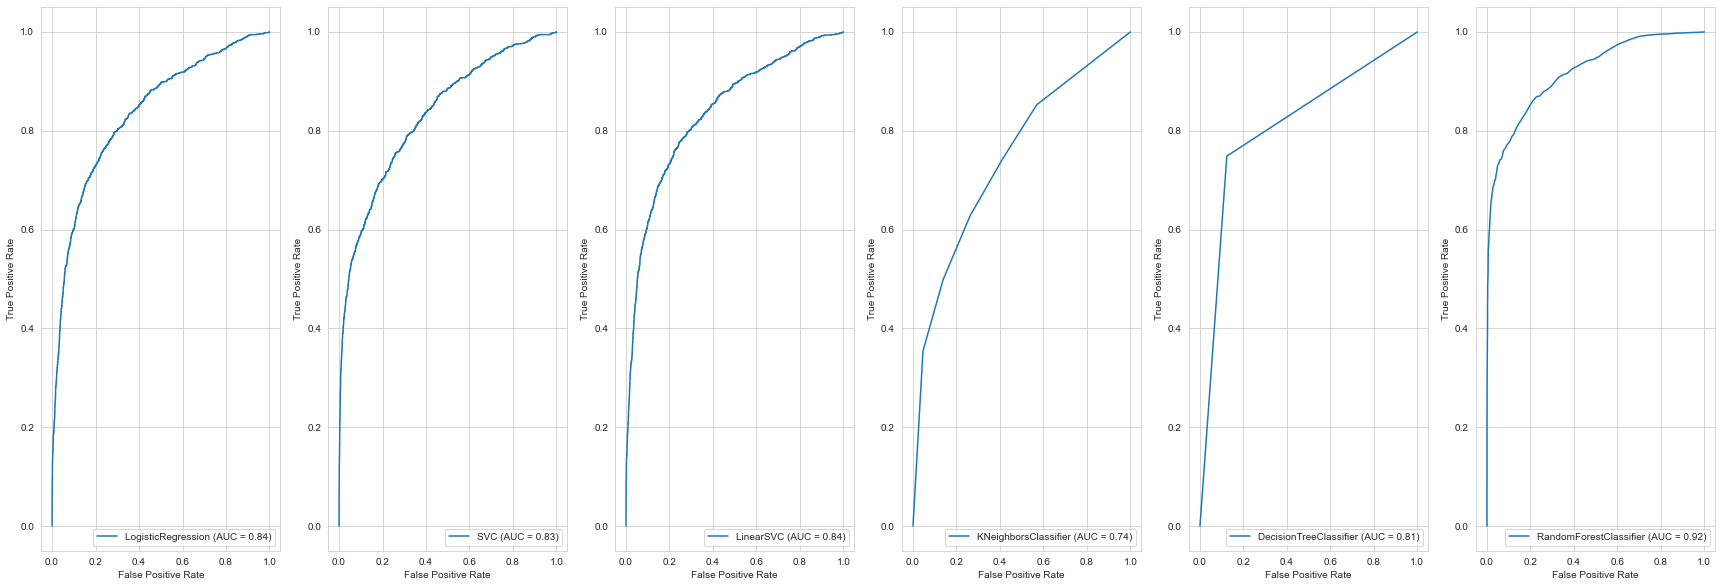

In [59]:
# check best performing model on test data!
fig, axes = plt.subplots(1, 6, figsize = (30,10))
i=0
for name, model in models:
    ml_model = model.fit(X_train_res,y_train_res)
    yhat = ml_model.predict(X_test)
    print("Classification report for :", name)
    print(classification_report(y_test, yhat), "\n")
    plot_roc_curve(ml_model, X_test, y_test, ax = axes[i])
    i+=1

### Random Forest Classifier performs the best on test data!

### Applying model on entire data

In [60]:
df_pd = df2.copy(deep=True)
df_pd.drop(columns=['Cust_Id'], inplace = True)

In [61]:
#Replacing 'Y' Values with 1 and 'N' Values with 0
rep = { 'Y':1,
       'N':0}
df_pd = df_pd.replace(rep)

df_pd = pd.get_dummies(df_pd)
df_pd.reset_index(drop=True, inplace=True)

In [62]:
df_pd.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Default History,Credit History,Location_Bangalore,...,Loan Purpose_MEDICAL,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G
0,21,1,720000,5.0,75000,11.14,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
1,25,1,720000,1.0,412500,12.87,1,0,3,0,...,1,0,0,0,0,1,0,0,0,0
2,23,1,4912500,4.0,2625000,15.23,1,0,2,0,...,1,0,0,0,0,1,0,0,0,0
3,24,1,4080000,8.0,2625000,14.27,1,1,4,0,...,1,0,0,0,0,1,0,0,0,0
4,21,1,742500,2.0,187500,7.14,1,0,2,0,...,0,0,1,1,0,0,0,0,0,0


In [63]:
# Building model on entire dataset

rf_mod = RandomForestClassifier(random_state=42)
rf_model = rf_mod.fit(X_train_res,y_train_res)

In [64]:
yhat = rf_model.predict(df_pd.drop(["loan_status"], axis =1))

In [65]:
np.unique(yhat, return_counts = True)

(array([0, 1], dtype=int64), array([24793,  4738], dtype=int64))

In [66]:
yhat_proba = rf_model.predict_proba(df_pd.drop(["loan_status"], axis = 1))

In [67]:
print(classification_report(df_pd["loan_status"], yhat), "\n")

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     23126
           1       0.48      0.36      0.41      6405

    accuracy                           0.78     29531
   macro avg       0.66      0.63      0.64     29531
weighted avg       0.76      0.78      0.77     29531
 



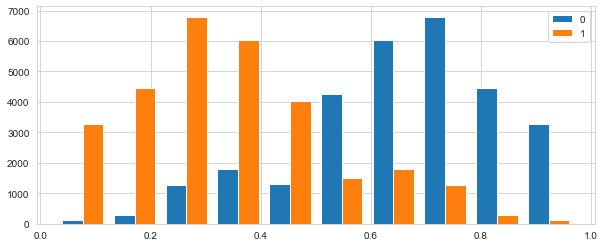

In [68]:
# Blue - "0"
# Red - "1"
fig, axes = plt.subplots(1, 1, figsize = (10,4))
plt.hist(yhat_proba)
plt.legend(["0","1"])

In [69]:
# [prob of "0", prob of "1"]
yhat_proba

array([[0.83, 0.17],
       [0.7 , 0.3 ],
       [0.65, 0.35],
       ...,
       [0.59, 0.41],
       [0.79, 0.21],
       [0.49, 0.51]])

In [70]:
df_pd["Default_Proba"] =pd.DataFrame(yhat_proba[:,1]).copy()
df_pd.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Default History,Credit History,Location_Bangalore,...,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default_Proba
0,21,1,720000,5.0,75000,11.14,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0.17
1,25,1,720000,1.0,412500,12.87,1,0,3,0,...,0,0,0,0,1,0,0,0,0,0.30
2,23,1,4912500,4.0,2625000,15.23,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0.35
3,24,1,4080000,8.0,2625000,14.27,1,1,4,0,...,0,0,0,0,1,0,0,0,0,0.56
4,21,1,742500,2.0,187500,7.14,1,0,2,0,...,0,1,1,0,0,0,0,0,0,0.10


### Calculating EAD 

In [71]:
df_ead = df_pd.copy(deep=True)
df_ead.reset_index(drop=True, inplace=True)
df_ead.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Default History,Credit History,Location_Bangalore,...,Loan Purpose_PERSONAL,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default_Proba
0,21,1,720000,5.0,75000,11.14,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0.17
1,25,1,720000,1.0,412500,12.87,1,0,3,0,...,0,0,0,0,1,0,0,0,0,0.30
2,23,1,4912500,4.0,2625000,15.23,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0.35
3,24,1,4080000,8.0,2625000,14.27,1,1,4,0,...,0,0,0,0,1,0,0,0,0,0.56
4,21,1,742500,2.0,187500,7.14,1,0,2,0,...,0,1,1,0,0,0,0,0,0,0.10


In [72]:
# Scaling data
ead_sc=MinMaxScaler()
ead_scale = ead_sc.fit_transform(df_ead)
ead_scale = pd.DataFrame(ead_scale)
ead_scale.columns = df_ead.columns
ead_scale.head()

X = ead_scale.drop(["Loan Balance"], axis = 1)
Y = ead_scale["Loan Balance"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [73]:
# Using a more complex model to see if it performs better!

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_features.fit_transform(X)

# SGDRegressor - Minimises OLS

sgd_reg = SGDRegressor()
sgd_reg.fit(x_poly, Y.ravel())

y_pred = sgd_reg.predict(x_poly)
print("R-squared value on test data is: ", r2_score(Y, y_pred))
# sgd_reg.intercept_, sgd_reg.coef_

R-squared value on test data is:  0.1967482184234004


In [74]:
# Not scaling data
# using df_ead after removing Default_Proba

X = df_ead.drop(["Loan Balance", "Default_Proba"], axis =1)
Y = df_ead["Loan Balance"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
y_pred_full = rf.predict(X)

print("R^2 value on test data is  : ", r2_score(y_test, y_pred_test))
print("R^2 value on entire data is  : ", r2_score(Y, y_pred_full))

R^2 value on test data is  :  0.28515609839463896
R^2 value on entire data is  :  0.7818403373404987


#### Using the RandomForestRegressor algorithm for predicting EAD!

In [75]:
df_ead["EAD"] = pd.DataFrame(y_pred_full)
df_ead.head()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Default History,Credit History,Location_Bangalore,...,Loan Purpose_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Default_Proba,EAD
0,21,1,720000,5.0,75000,11.14,0,0,2,0,...,0,0,1,0,0,0,0,0,0.17,84000.0
1,25,1,720000,1.0,412500,12.87,1,0,3,0,...,0,0,0,1,0,0,0,0,0.30,303337.5
2,23,1,4912500,4.0,2625000,15.23,1,0,2,0,...,0,0,0,1,0,0,0,0,0.35,1978875.0
3,24,1,4080000,8.0,2625000,14.27,1,1,4,0,...,0,0,0,1,0,0,0,0,0.56,813787.5
4,21,1,742500,2.0,187500,7.14,1,0,2,0,...,1,1,0,0,0,0,0,0,0.10,211162.5


### Loss Given Default (LGD) is assumed at 50% 

In [76]:
# Merging data from df2 & df_ead
final_df = pd.concat([df2["Cust_Id"], df_ead["Loan Balance"], df_ead["Default_Proba"], df_ead["EAD"]], axis=1)
final_df["LGD"] = 0.50

In [77]:
final_df["Exp_loss_cust"] = final_df["Default_Proba"]*final_df["EAD"]*final_df["LGD"]
expected_loss = sum(final_df["Exp_loss_cust"])
exp_loss_perc = expected_loss/sum(final_df["Loan Balance"])
final_df.head()

,Cust_Id,Loan Balance,Default_Proba,EAD,LGD,Exp_loss_cust
0,2,75000,0.17,84000.0,0.5,7140.000
1,3,412500,0.30,303337.5,0.5,45500.625
2,4,2625000,0.35,1978875.0,0.5,346303.125
3,5,2625000,0.56,813787.5,0.5,227860.500
4,6,187500,0.10,211162.5,0.5,10558.125


In [78]:
final_df.sort_values(by = "Exp_loss_cust", ascending = False).head(5)

,Cust_Id,Loan Balance,Default_Proba,EAD,LGD,Exp_loss_cust
27213,28449,2625000,0.85,2272687.50,0.5,965892.1875
16031,16514,2625000,0.89,2129175.00,0.5,947482.8750
26117,27260,2625000,0.90,2088993.75,0.5,940047.1875
17331,17861,2625000,0.82,2230500.00,0.5,914505.0000
26019,27153,2250000,0.92,1978668.75,0.5,910187.6250


In [79]:
print("The expected loss value with respect to existing loan balance stands at : ", round(exp_loss_perc*100,2)," %")

The expected loss value with respect to existing loan balance stands at :  16.98  %


#### The Expected Loss value is relatively high compared to similar industry benchmarks.
#### The reason for the relatively high Expected Loss value can be attributed to lack of sufficient data required at different stages!